# Predicción de precios de viviendas usando regresiones lineales (simples y múltiples)

In [1]:
#Vamos a importar los módulos necesarios
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
pequeño = 10
medio = 18

plt.rc('font', size=pequeño)          # controls default text sizes
plt.rc('axes', titlesize=pequeño)     # fontsize of the axes title
plt.rc('axes', labelsize=medio)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=pequeño)    # fontsize of the tick labels
plt.rc('ytick', labelsize=pequeño)    # fontsize of the tick labels
plt.rc('legend', fontsize=medio)    # legend fontsize

Este dataframe tiene algunas características bastante útiles como los metros cuadrados, el número de baños o el número de habitaciones. Nuestro objetivo será predecir el precio de una vivienda a partir de las características que tenemos disponibles.

In [3]:
#Veamos cuántas filas y cuantas columnas tiene este dataframe
print('En total hay ' + str(df.shape[0])+' filas y ' + str(df.shape[1]) + ' columnas')
df.columns

En total hay 21613 filas y 21 columnas


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Visualización de datos

In [4]:
#Vamos a definir un subset de datos con las características más relevantes de estos datos.
df_vis = df[['price','bedrooms','bathrooms','floors','sqft_living','sqft_basement','waterfront','yr_renovated','yr_built']]

Estudiemos cómo varía el precio de las viviendas según algunas de las características. En concreto, veremos cómo afectan los metros cuadrados de la vivienda, el número de habitaciones y el número de baños

[Text(0, 0.5, 'Precio'), Text(0.5, 0, 'Metros Cuadrados')]

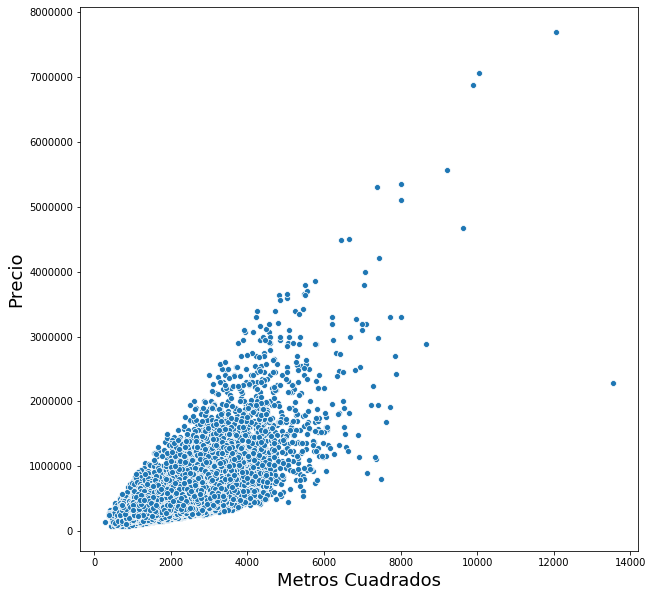

In [5]:
f, axes = plt.subplots(1,1, figsize=(10,10))
a = sns.scatterplot(x='sqft_living', y='price',ax=axes, data=df_vis)
axes.set(xlabel='Metros Cuadrados', ylabel='Precio')

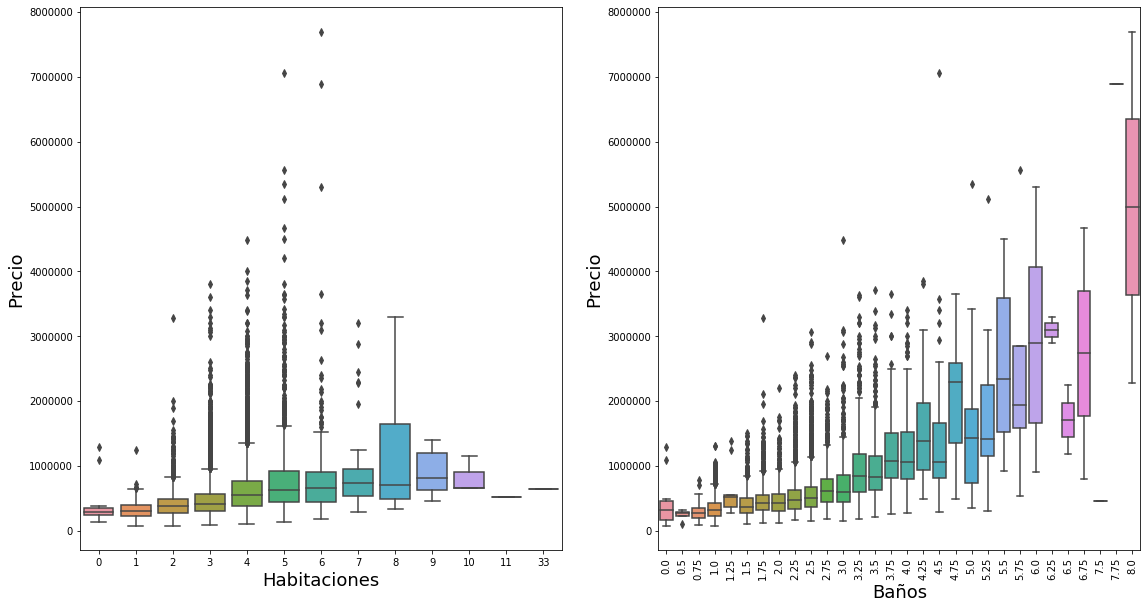

In [6]:
f, axes2 = plt.subplots(1,2,figsize=(19,10))
b =sns.boxplot(x='bedrooms',y='price',ax=axes2[0], data=df_vis)
c = sns.boxplot(x='bathrooms',y='price',ax=axes2[1], data=df_vis)
rotacion_Xticks = axes2[1].set_xticklabels(axes2[1].get_xticklabels(),rotation=90)
axes2_1 = axes2[0].set(xlabel='Habitaciones',ylabel='Precio')
axes2_2 = axes2[1].set(xlabel='Baños', ylabel='Precio')

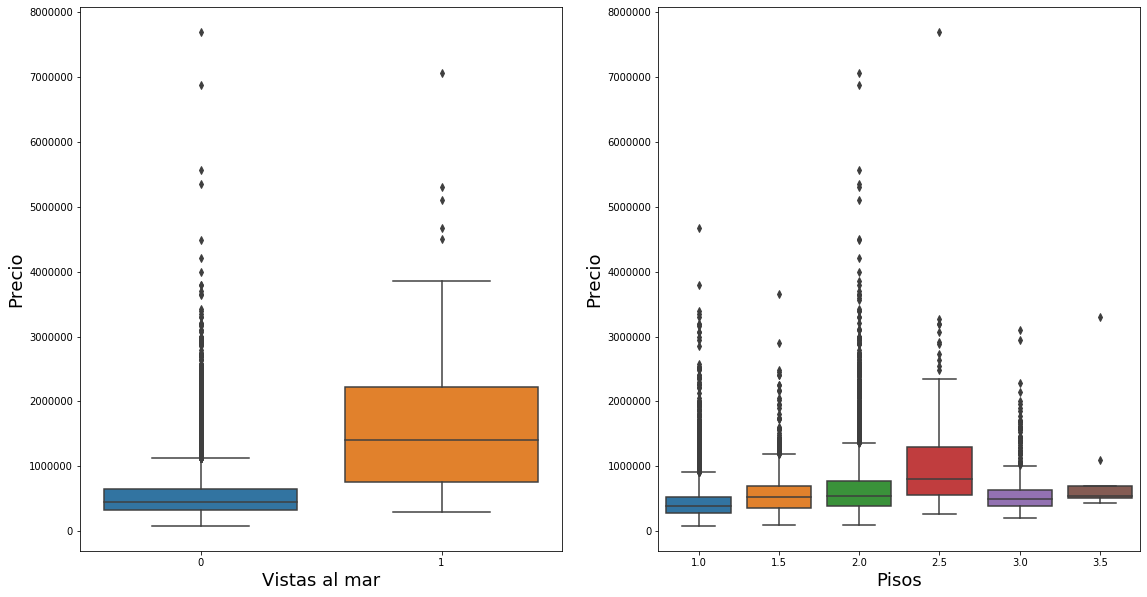

In [7]:
f, axes3 = plt.subplots(1,2,figsize=(19,10))
fig1 = sns.boxplot(x='waterfront', y='price',ax=axes3[0],data=df_vis)
ejesfig1 = axes3[0].set(xlabel='Vistas al mar',ylabel='Precio')
fig2 = sns.boxplot(x='floors',y='price',ax=axes3[1],data=df_vis)
ejesfig2 = axes3[1].set(xlabel='Pisos',ylabel='Precio')

# Un primer análisis de las gráficas mostradas anteriormente

La primera gráfica muestra una tendencia alcista según los metros cuadrados de la vivienda; un resultado bastante coherente y esperado. 

Asimismo, al analizar el precio según el número de habitaciones observamos un patrón de subida hasta alcanzar las 9 habitaciones, luego en 10 el precio disminuye un poco. Por otro lado, se aprecia que el margen de precio se mantiene medianamente constante para cualquier número de habitaciones en la vivienda, excepto para aquellas que tienen 8 habitaciones, que tiene un rango de precios mucho más amplio. 

En cuanto al número de baños, parece ser que hasta los cuatro baños en la vivienda los precios se mantienen acotados. A partir de cuatro baños, los precios se disparan a la vez que se alarga el rango de los mismos.

Para aquellas viviendas que tienen vistas al mar observamos que los precios son considerablemente más altos, algo que al igual que los metros cuadrados, era medianamente previsible.

Este pequeño entendimiento de los datos nos ayudará a elegir unas características u otras a la hora de predecir los precios de la vivienda.

# Separación de los datos en train-test (train-test split)

Dado que nuestro set de datos no está diferenciado entre datos que serán usados para entrenar el modelo o para testearlo, debemos hacerlo manualmente utilizando "train_test_split".

In [8]:
train_csv, test_csv = train_test_split(df,train_size = 0.85,random_state=1)

# Regresión Lineal Simple (Precio - Metros Cuadrados)

In [9]:
#Vamos a hacer una regresión lineal simple empleando los metros cuadrados como predictor.
lineal_reg = linear_model.LinearRegression()
X_1 = np.array(train_csv['sqft_living'])
X_train = X_1.reshape(-1,1)
Y_train = np.array(train_csv['price'])

#Ajustamos
lineal_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#Set de testeo
X_test = np.array(test_csv['sqft_living']).reshape(-1,1)
Y_test = np.array(test_csv['price'])

In [11]:
#Predicciones
Y_pred = lineal_reg.predict(X_test)

In [12]:
print('La pendiente de la regresión lineal es '+ str(lineal_reg.coef_.round(4)))
print('La ordenada de la regresión lineal es '+ str(lineal_reg.intercept_.round(4)))

La pendiente de la regresión lineal es [280.4617]
La ordenada de la regresión lineal es -43250.4144


Text(0, 0.5, 'Precio')

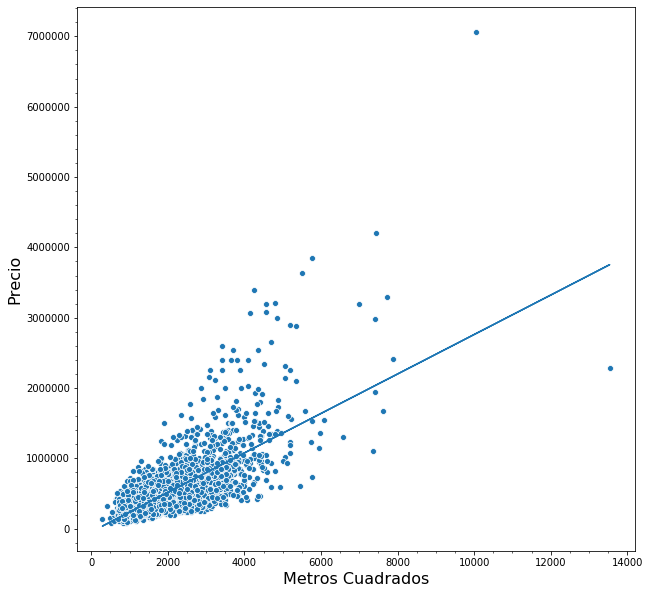

In [13]:
f, axes = plt.subplots(1,1, figsize=(10,10))
plt.minorticks_on()
Fig_1 = sns.scatterplot(x='sqft_living', y='price',ax=axes, data=test_csv)
reg_2 = plt.plot(X_test,Y_pred )
plt.xlabel('Metros Cuadrados', fontsize=16)
plt.ylabel('Precio', fontsize=16)

## Métricas de precisión de la regresión simple

### Error absoluto medio

In [14]:
EAM = metrics.mean_absolute_error(Y_test, Y_pred)
print('El Error absoluto medio ' + str(EAM.round(2)))

El Error absoluto medio 174798.78


### Error cuadrático medio

In [15]:
ECM = metrics.mean_squared_error(Y_test,Y_pred)
print('El error cuadrático medio es ' + str(ECM.round(2)))

El error cuadrático medio es 74744588930.51


### Raíz del error cuadrático medio

In [16]:
RECM = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print('El RECM es '+ str(RECM.round(2)))

El RECM es 273394.57


# Regresión Lineal Múltiple (1) (Precio - Metros2, Habitaciones)

Dado que utilizar una sola característica es algo poco apropiado, procedemos a realizar algunas regresiones múltiples. En primer lugar usaremos los metros cuadrados y el número de habitaciones como características principales. A continuación, los metros cuadrados y los baños. Finalmente, realizaremos una regresión múltiple incorporando tanto los metros cuadrados como las habitaciones y baños. 

In [17]:
caracteristicas1 = ['sqft_living','sqft_basement','bedrooms']
X_train_1 = train_csv[caracteristicas1]
Y_train = Y_train
X_test_1 = test_csv[caracteristicas1]
Y_test = Y_test

In [18]:
multiple_reg_1 = linear_model.LinearRegression()
multiple_reg_1.fit(X_train_1,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
Y_multiple_pred1 = multiple_reg_1.predict(X_test_1)
print('Coeficientes: '+ str(multiple_reg_1.coef_))
print('Ordenada: '+ str(multiple_reg_1.intercept_))

Coeficientes: [ 3.08733174e+02  2.43728562e+01 -5.67646376e+04]
Ordenada: 82009.22361504781


## Métricas de la regresión lineal múltiple (1)

In [20]:
EAM_mult1 = metrics.mean_absolute_error(Y_test, Y_multiple_pred1)
ECM_mult1 = metrics.mean_squared_error(Y_test, Y_multiple_pred1)
RECM_mult1 = np.sqrt(metrics.mean_squared_error(Y_test, Y_multiple_pred1))
print('EAM = ' + str(EAM_mult1))
print('ECM = ' + str(ECM_mult1))
print('RECM = ' + str(RECM_mult1))

EAM = 170054.1247549488
ECM = 72311062038.03662
RECM = 268907.1624892811


# Regresión Lineal Múltiple (2) (Precio - Metros2, Baños)

In [21]:
caracteristicas2 = ['sqft_living','sqft_basement','bathrooms']
X_train_2 = train_csv[caracteristicas2]
Y_train = Y_train
X_test_2 = test_csv[caracteristicas2]
Y_test = Y_test

In [22]:
multiple_reg_2 = linear_model.LinearRegression()
multiple_reg_2.fit(X_train_2,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
Y_multiple_pred2 = multiple_reg_2.predict(X_test_2)
print('Coeficientes: '+ str(multiple_reg_2.coef_))
print('Ordenada: '+ str(multiple_reg_2.intercept_))

Coeficientes: [  278.25211742    16.57799532 -1981.61849814]
Ordenada: -39302.12095375941


### Métricas de la regresión lineal múltiple (2)

In [24]:
EAM_mult2 = metrics.mean_absolute_error(Y_test, Y_multiple_pred2)
ECM_mult2 = metrics.mean_squared_error(Y_test, Y_multiple_pred2)
RECM_mult2 = np.sqrt(metrics.mean_squared_error(Y_test, Y_multiple_pred2))
print('EAM = ' + str(EAM_mult2))
print('ECM = ' + str(ECM_mult2))
print('RECM = ' + str(RECM_mult2))

EAM = 174537.3074921556
ECM = 74611044869.17542
RECM = 273150.22399620217


# Regresión Lineal Múltiple (3) (Precio - Metros2, Baños y Habitaciones)

In [25]:
caracteristicas3 = ['sqft_living','sqft_basement','bathrooms','bedrooms']
X_train_3 = train_csv[caracteristicas3]
Y_train = Y_train
X_test_3 = test_csv[caracteristicas3]
Y_test = Y_test

multiple_reg_3 = linear_model.LinearRegression()
multiple_reg_3.fit(X_train_3,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
Y_multiple_pred3 = multiple_reg_3.predict(X_test_3)
print('Coeficientes: '+ str(multiple_reg_3.coef_))
print('Ordenada: '+ str(multiple_reg_3.intercept_))

Coeficientes: [ 3.01889424e+02  2.55762474e+01  1.13941592e+04 -5.79097019e+04]
Ordenada: 75643.85038677673


In [27]:
EAM_mult3 = metrics.mean_absolute_error(Y_test, Y_multiple_pred3)
ECM_mult3 = metrics.mean_squared_error(Y_test, Y_multiple_pred3)
RECM_mult3 = np.sqrt(metrics.mean_squared_error(Y_test, Y_multiple_pred3))
print('EAM = ' + str(EAM_mult3))
print('ECM = ' + str(ECM_mult3))
print('RECM = ' + str(RECM_mult3))

EAM = 170074.33008885288
ECM = 72336296309.8004
RECM = 268954.07844054047


# Valor del coeficiente $R^2$ de cada modelo

In [28]:
R2_simple = lineal_reg.score(X_test,Y_test)
R2_mult1 = multiple_reg_1.score(X_test_1,Y_test)
R2_mult2 = multiple_reg_2.score(X_test_2,Y_test)
R2_mult3 = multiple_reg_3.score(X_test_3,Y_test)

print('El valor R2 de la regresión lineal simple es ' + str(R2_simple))
print('El valor R2 de la regresión lineal múltple (1) es ' + str(R2_mult1))
print('El valor R2 de la regresión lineal múltple (2) es ' + str(R2_mult2))
print('El valor R2 de la regresión lineal múltple (3) es ' + str(R2_mult3))

El valor R2 de la regresión lineal simple es 0.4910058627910613
El valor R2 de la regresión lineal múltple (1) es 0.5075776432869332
El valor R2 de la regresión lineal múltple (2) es 0.49191526834472576
El valor R2 de la regresión lineal múltple (3) es 0.5074058034712586


# Valor de $R^2$ ajustado

<center>
    <h2>  $R^2_{ajustado}$= $R^2$ - $\frac{k-1}{n-k}(1-R^2)$ </h2>
    </center>

In [29]:
def ajusteR2(R,n,k):
    RAjuste = R - ((k-1)/(n-k))*(1-R)
    return RAjuste

In [30]:
R2_ajustado_simple = ajusteR2(R2_simple, X_test.shape[0], 1)
R2_ajustado_mult1 = ajusteR2(R2_mult1, X_test_1.shape[0],len(caracteristicas1))
R2_ajustado_mult2 = ajusteR2(R2_mult2, X_test_2.shape[0],len(caracteristicas2))
R2_ajustado_mult3 = ajusteR2(R2_mult3, X_test_3.shape[0],len(caracteristicas3))

In [31]:
print('El valor R2 ajustado de la regresión lineal simple es ' + str(R2_ajustado_simple))
print('El valor R2 ajustado de la regresión lineal múltple (1) es ' + str(R2_ajustado_mult1))
print('El valor R2 ajustado de la regresión lineal múltple (2) es ' + str(R2_ajustado_mult2))
print('El valor R2 ajustado de la regresión lineal múltple (3) es ' + str(R2_ajustado_mult3))

El valor R2 ajustado de la regresión lineal simple es 0.4910058627910613
El valor R2 ajustado de la regresión lineal múltple (1) es 0.5072735850240663
El valor R2 ajustado de la regresión lineal múltple (2) es 0.49160153896426556
El valor R2 ajustado de la regresión lineal múltple (3) es 0.5069494160130789
